### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import to_categorical

In [2]:
for dirname,_,filenames in os.walk("input"):
    if len(dirname.split("\\"))<3:
        print(f"{dirname} has -> {len(os.listdir(dirname))} directories","\n")
    else:
        print(f"{dirname} has -> {len(os.listdir(dirname))} files","\n")

input has -> 2 directories 

input\train has -> 6 directories 

input\train\Apple_Bad has -> 912 files 

input\train\Apple_Good has -> 919 files 

input\train\Banana_Bad has -> 869 files 

input\train\Banana_Good has -> 890 files 

input\train\Lime_Bad has -> 868 files 

input\train\Lime_Good has -> 875 files 

input\val has -> 6 directories 

input\val\Apple_Bad has -> 229 files 

input\val\Apple_Good has -> 230 files 

input\val\Banana_Bad has -> 218 files 

input\val\Banana_Good has -> 223 files 

input\val\Lime_Bad has -> 217 files 

input\val\Lime_Good has -> 219 files 



In [3]:
train_path="input/train"
train_labels=os.listdir(train_path)
train_chart_data=[]
for label in train_labels:
    train_class_path=train_path+f"/{label}"
    train_chart_data.append(len(os.listdir(train_class_path)))
print(train_labels)
print(train_chart_data)

['Apple_Bad', 'Apple_Good', 'Banana_Bad', 'Banana_Good', 'Lime_Bad', 'Lime_Good']
[912, 919, 869, 890, 868, 875]


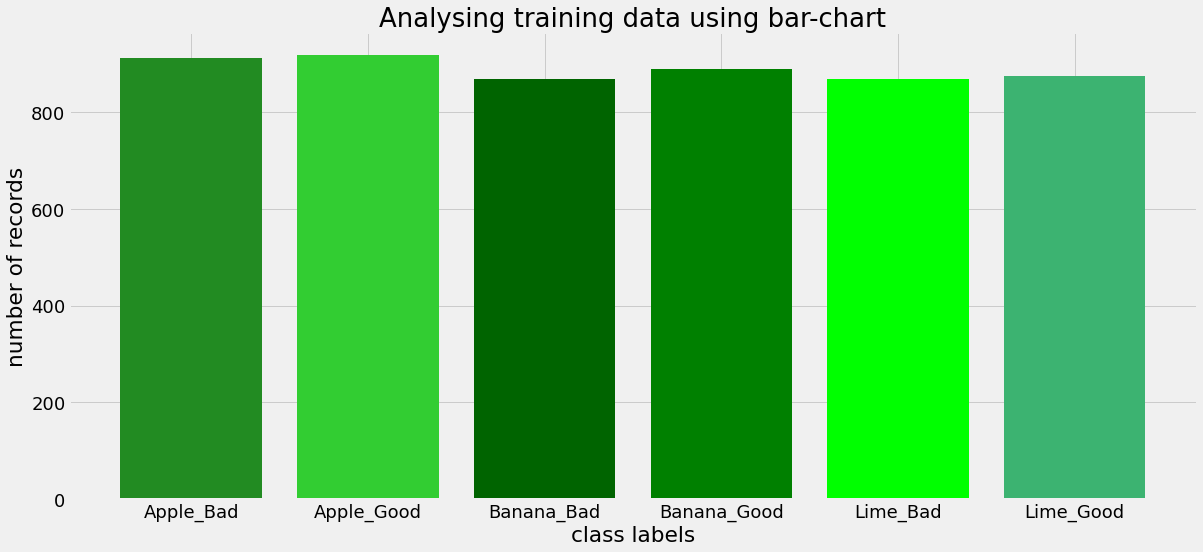

In [4]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    plt.bar(x=train_labels,
            height=train_chart_data,
            color=["forestgreen","limegreen","darkgreen","green","lime","mediumseagreen"])
    plt.title(label="Analysing training data using bar-chart")
    plt.xlabel(xlabel="class labels")
    plt.ylabel(ylabel="number of records")
    plt.show()

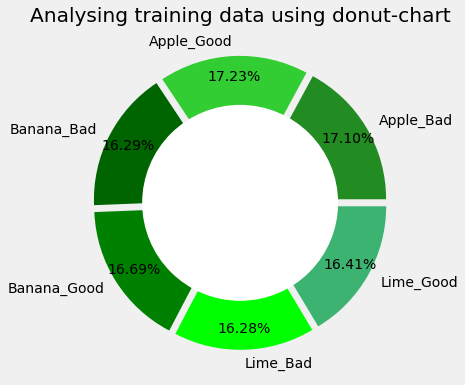

In [5]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(6,6))
    plt.pie(x=train_chart_data,
        colors=["forestgreen","limegreen","darkgreen","green","lime","mediumseagreen"],
        labels=train_labels,
        autopct='%.2f%%',
        pctdistance=0.85,
        explode=[0.05]*6)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(label="Analysing training data using donut-chart")
    plt.show()

In [6]:
test_path="input/val"
test_labels=os.listdir(test_path)
test_chart_data=[]
for label in test_labels:
    test_class_path=test_path+f"/{label}"
    test_chart_data.append(len(os.listdir(test_class_path)))
print(test_labels)
print(test_chart_data)

['Apple_Bad', 'Apple_Good', 'Banana_Bad', 'Banana_Good', 'Lime_Bad', 'Lime_Good']
[229, 230, 218, 223, 217, 219]


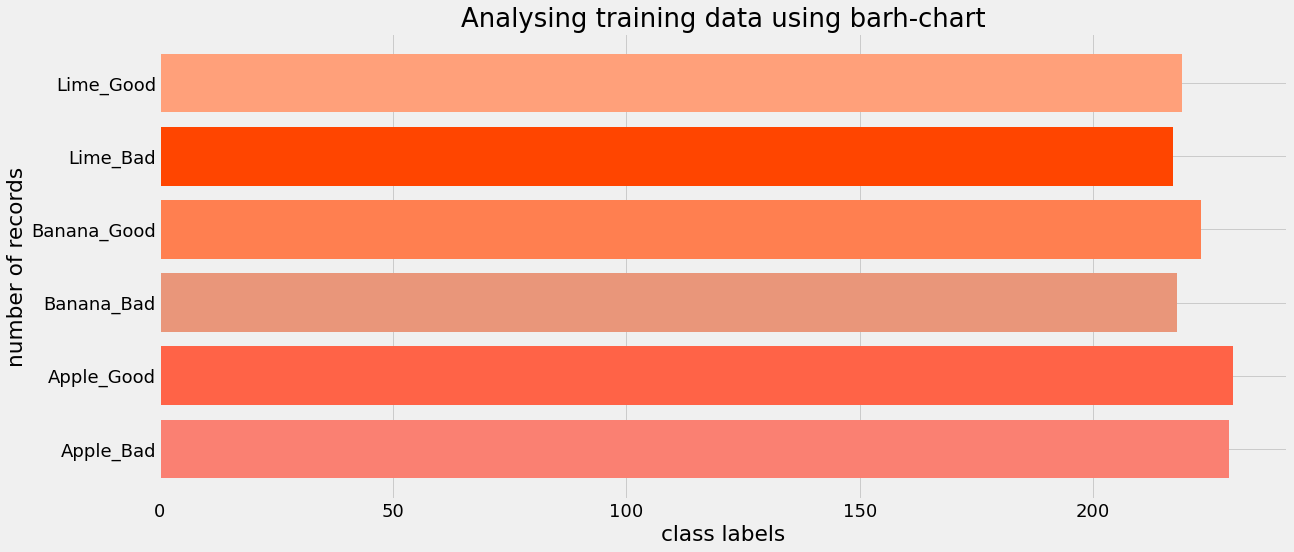

In [7]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    plt.barh(y=test_labels,
             width=test_chart_data,
             color=["salmon","tomato","darksalmon","coral","orangered","lightsalmon"])
    plt.title(label="Analysing training data using barh-chart")
    plt.xlabel(xlabel="class labels")
    plt.ylabel(ylabel="number of records")
    plt.show()

### Data Loading

***Loading test-set***

In [9]:
base_dir_test="input/val/"

In [10]:
class_labels=os.listdir(base_dir_test)
print(class_labels)

['Apple_Bad', 'Apple_Good', 'Banana_Bad', 'Banana_Good', 'Lime_Bad', 'Lime_Good']


In [11]:
test_data=[]
count=0

for label in class_labels:
    i=0
    path = os.path.join(base_dir_test, label)
    print(path)
    for img in os.listdir(path):
        try:
            image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(128,128,3))
            image=img_to_array(image)
            image=image/255.0
            test_data.append([image,count])
        except Exception as e:
                pass
    count=count+1

input/val/Apple_Bad
input/val/Apple_Good
input/val/Banana_Bad
input/val/Banana_Good
input/val/Lime_Bad
input/val/Lime_Good


In [12]:
print(len(test_data))

1336


In [13]:
x_test,Y_test =zip(*test_data)

In [14]:
x_test

(array([[[0.49411765, 0.49019608, 0.4117647 ],
         [0.5058824 , 0.5019608 , 0.42352942],
         [0.5137255 , 0.50980395, 0.43137255],
         ...,
         [0.654902  , 0.6627451 , 0.6117647 ],
         [0.65882355, 0.6666667 , 0.6156863 ],
         [0.67058825, 0.6784314 , 0.627451  ]],
 
        [[0.4862745 , 0.48235294, 0.40392157],
         [0.49803922, 0.49411765, 0.41568628],
         [0.5058824 , 0.5019608 , 0.42352942],
         ...,
         [0.6627451 , 0.67058825, 0.61960787],
         [0.6666667 , 0.6745098 , 0.62352943],
         [0.67058825, 0.6784314 , 0.627451  ]],
 
        [[0.4862745 , 0.48235294, 0.40392157],
         [0.49803922, 0.49411765, 0.41568628],
         [0.5058824 , 0.5019608 , 0.42352942],
         ...,
         [0.6666667 , 0.6745098 , 0.62352943],
         [0.6784314 , 0.6862745 , 0.63529414],
         [0.67058825, 0.6784314 , 0.627451  ]],
 
        ...,
 
        [[0.6666667 , 0.69803923, 0.7058824 ],
         [0.627451  , 0.65882355, 0.66666

In [15]:
print(Y_test)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [16]:
X_test=np.array(x_test)
y_test=np.array(Y_test)

In [17]:
print(X_test.shape,y_test.shape)

(1336, 128, 128, 3) (1336,)


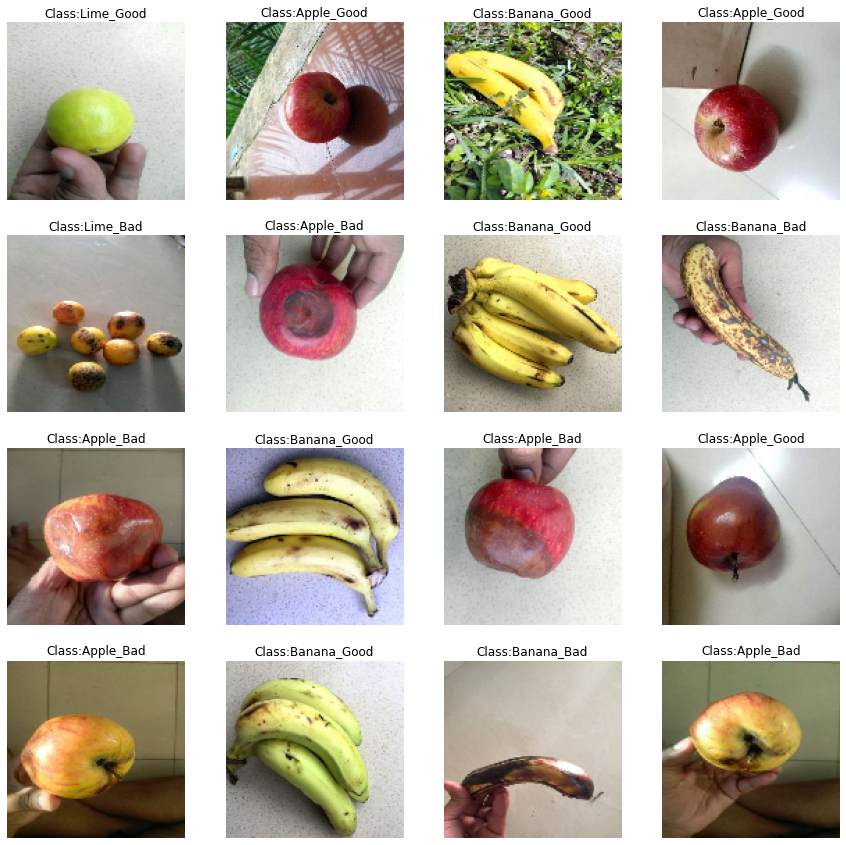

In [18]:
from random import randint
def show_images(X,y):
    labels =class_labels
    x,y = X,y
    plt.figure(figsize=(15, 15))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, X_test.shape[0]-1)
        plt.imshow(x[idx])
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
show_images(X_test,y_test)

***Loading train-set***

In [19]:
base_dir_train="input/train/"

In [20]:
class_labels=os.listdir(base_dir_train)
print(class_labels)

['Apple_Bad', 'Apple_Good', 'Banana_Bad', 'Banana_Good', 'Lime_Bad', 'Lime_Good']


In [21]:
train_data=[]
count=0

for label in class_labels:
    i=0
    path = os.path.join(base_dir_train, label)
    print(path)
    for img in os.listdir(path):
        try:
            image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(128,128,3))
            image=img_to_array(image)
            image=image/255.0
            train_data.append([image,count])
        except Exception as e:
                pass
    count=count+1

input/train/Apple_Bad
input/train/Apple_Good
input/train/Banana_Bad
input/train/Banana_Good
input/train/Lime_Bad
input/train/Lime_Good


In [22]:
print(len(train_data))

5333


In [23]:
x_train,Y_train =zip(*train_data)

In [24]:
X_train=np.array(x_train)
y_train=np.array(Y_train)

In [25]:
print(X_train.shape,y_train.shape)

(5333, 128, 128, 3) (5333,)


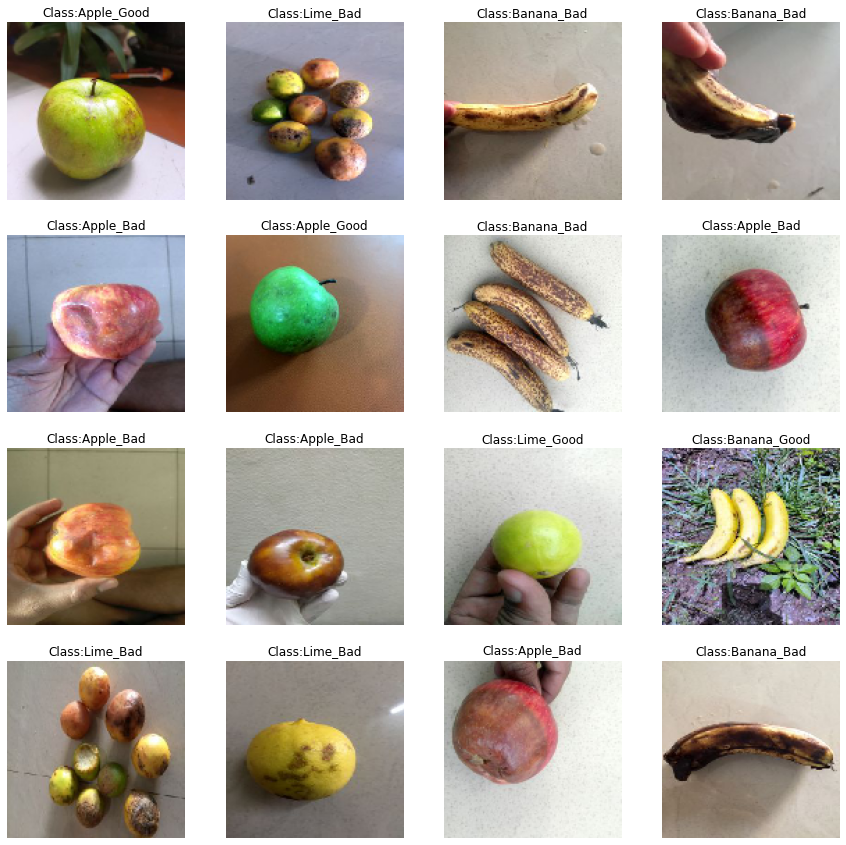

In [26]:
from random import randint
def show_images(X,y):
    labels =class_labels
    x,y = X,y
    plt.figure(figsize=(15, 15))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, X_train.shape[0]-1)
        plt.imshow(x[idx])
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
show_images(X_train,y_train)

### Algorithm -DenseNet_201

In [27]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [28]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
densenet_model=tf.keras.applications.DenseNet201(include_top=False,
                                                   weights="imagenet",
                                                   input_tensor=None,
                                                   input_shape=(128,128,3),
                                                   pooling="max",
                                                   classes=1000)
densenet_model.trainable = False

In [30]:
inputs = densenet_model.input
m = tf.keras.layers.Dense(512, activation='relu')(densenet_model.output)
outputs = tf.keras.layers.Dense(6, activation='softmax')(m)
dense_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [31]:
dense_model.compile(optimizer=Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
dense_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 32, 32, 192)  0          ['conv2_block3_concat[0][0]',    
 te)      

 conv3_block2_1_conv (Conv2D)   (None, 16, 16, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 16, 16, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 16, 16, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 16, 16, 320)  0          ['conv3_block7_0_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 16, 16, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 16, 16, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_blo

 conv4_block3_0_bn (BatchNormal  (None, 8, 8, 320)   1280        ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 8, 8, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 8, 8, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 8, 8, 480)   0           ['conv4_block6_concat[0][0]',    
 te)      

 conv4_block11_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 8, 8, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 8, 8, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 8, 8, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_0_relu (Activati  (None, 8, 8, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 8, 8, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 8, 8, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block24_concat (Concaten  (None, 8, 8, 1024)  0           ['conv4_block23_concat[0][0]',   
 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 8, 8, 1024)  4096        ['conv4_block24_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 8, 8, 1024)  0           ['conv4_block25_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_1_conv (Conv2D)  (None, 8, 8, 128)    131072      ['conv4_block25_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 8, 8, 128)    147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block33_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block33_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block33_1_relu[0][0]']   
                                                                                                  
 conv4_block33_concat (Concaten  (None, 8, 8, 1312)  0           ['conv4_block32_concat[0][0]',   
 ate)                                                             'conv4_block33_2_conv[0][0]']   
                                                                                                  
 conv4_block34_0_bn (BatchNorma  (None, 8, 8, 1312)  5248        ['conv4_block33_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block38_0_bn (BatchNorma  (None, 8, 8, 1440)  5760        ['conv4_block37_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block38_0_relu (Activati  (None, 8, 8, 1440)  0           ['conv4_block38_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block38_1_conv (Conv2D)  (None, 8, 8, 128)    184320      ['conv4_block38_0_relu[0][0]']   
                                                                                                  
 conv4_block38_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block38_1_conv[0][0]']   
 lization)

 conv4_block42_1_conv (Conv2D)  (None, 8, 8, 128)    200704      ['conv4_block42_0_relu[0][0]']   
                                                                                                  
 conv4_block42_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block42_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block42_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block42_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block42_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block42_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block46_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block46_1_relu[0][0]']   
                                                                                                  
 conv4_block46_concat (Concaten  (None, 8, 8, 1728)  0           ['conv4_block45_concat[0][0]',   
 ate)                                                             'conv4_block46_2_conv[0][0]']   
                                                                                                  
 conv4_block47_0_bn (BatchNorma  (None, 8, 8, 1728)  6912        ['conv4_block46_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block47_0_relu (Activati  (None, 8, 8, 1728)  0           ['conv4_block47_0_bn[0][0]']     
 on)      

 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_concat (Concatena  (None, 4, 4, 960)   0           ['conv5_block1_concat[0][0]',    
 te)                                                              'conv5_block2_2_conv[0][0]']    
                                                                                                  
 conv5_block3_0_bn (BatchNormal  (None, 4, 4, 960)   3840        ['conv5_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

 conv5_block7_0_bn (BatchNormal  (None, 4, 4, 1088)  4352        ['conv5_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block7_0_relu (Activatio  (None, 4, 4, 1088)  0           ['conv5_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block7_1_conv (Conv2D)   (None, 4, 4, 128)    139264      ['conv5_block7_0_relu[0][0]']    
                                                                                                  
 conv5_block7_1_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv5_block7_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block11_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block11_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block11_1_relu[0][0]']   
                                                                                                  
 conv5_block11_concat (Concaten  (None, 4, 4, 1248)  0           ['conv5_block10_concat[0][0]',   
 ate)     

 conv5_block15_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block15_1_relu[0][0]']   
                                                                                                  
 conv5_block15_concat (Concaten  (None, 4, 4, 1376)  0           ['conv5_block14_concat[0][0]',   
 ate)                                                             'conv5_block15_2_conv[0][0]']   
                                                                                                  
 conv5_block16_0_bn (BatchNorma  (None, 4, 4, 1376)  5504        ['conv5_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block16_0_relu (Activati  (None, 4, 4, 1376)  0           ['conv5_block16_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv5_block20_0_relu (Activati  (None, 4, 4, 1504)  0           ['conv5_block20_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block20_1_conv (Conv2D)  (None, 4, 4, 128)    192512      ['conv5_block20_0_relu[0][0]']   
                                                                                                  
 conv5_block20_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block20_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block20_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv5_block24_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block24_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block24_1_relu[0][0]']   
                                                                                                  
 conv5_block24_concat (Concaten  (None, 4, 4, 1664)  0           ['conv5_block23_concat[0][0]',   
 ate)                                                             'conv5_block24_2_conv[0][0]']   
                                                                                                  
 conv5_blo

 conv5_block28_concat (Concaten  (None, 4, 4, 1792)  0           ['conv5_block27_concat[0][0]',   
 ate)                                                             'conv5_block28_2_conv[0][0]']   
                                                                                                  
 conv5_block29_0_bn (BatchNorma  (None, 4, 4, 1792)  7168        ['conv5_block28_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block29_0_relu (Activati  (None, 4, 4, 1792)  0           ['conv5_block29_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block29_1_conv (Conv2D)  (None, 4, 4, 128)    229376      ['conv5_block29_0_relu[0][0]']   
          

 max_pool (GlobalMaxPooling2D)  (None, 1920)         0           ['relu[0][0]']                   
                                                                                                  
 dense (Dense)                  (None, 512)          983552      ['max_pool[0][0]']               
                                                                                                  
 dense_1 (Dense)                (None, 6)            3078        ['dense[0][0]']                  
                                                                                                  
Total params: 19,308,614
Trainable params: 986,630
Non-trainable params: 18,321,984
__________________________________________________________________________________________________


In [33]:
history = dense_model.fit(X_train, y_train, batch_size=32,validation_data = (X_test, y_test),epochs=10)

Epoch 1/10
167/167 [==============================] - 260s 1s/step - loss: 0.3345 - accuracy: 0.9374 - val_loss: 0.0711 - val_accuracy: 0.9753
Epoch 2/10
167/167 [==============================] - 252s 2s/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0105 - val_accuracy: 0.9970
Epoch 3/10
167/167 [==============================] - 245s 1s/step - loss: 0.0300 - accuracy: 0.9914 - val_loss: 0.0351 - val_accuracy: 0.9918
Epoch 4/10
167/167 [==============================] - 243s 1s/step - loss: 0.0114 - accuracy: 0.9955 - val_loss: 0.0237 - val_accuracy: 0.9948
Epoch 5/10
167/167 [==============================] - 240s 1s/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.0314 - val_accuracy: 0.9865
Epoch 6/10
167/167 [==============================] - 243s 1s/step - loss: 0.0100 - accuracy: 0.9964 - val_loss: 0.0190 - val_accuracy: 0.9925
Epoch 7/10
167/167 [==============================] - 244s 1s/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0077 - val_accuracy: 0.9970

### Accuracy and Loss plot-graphs

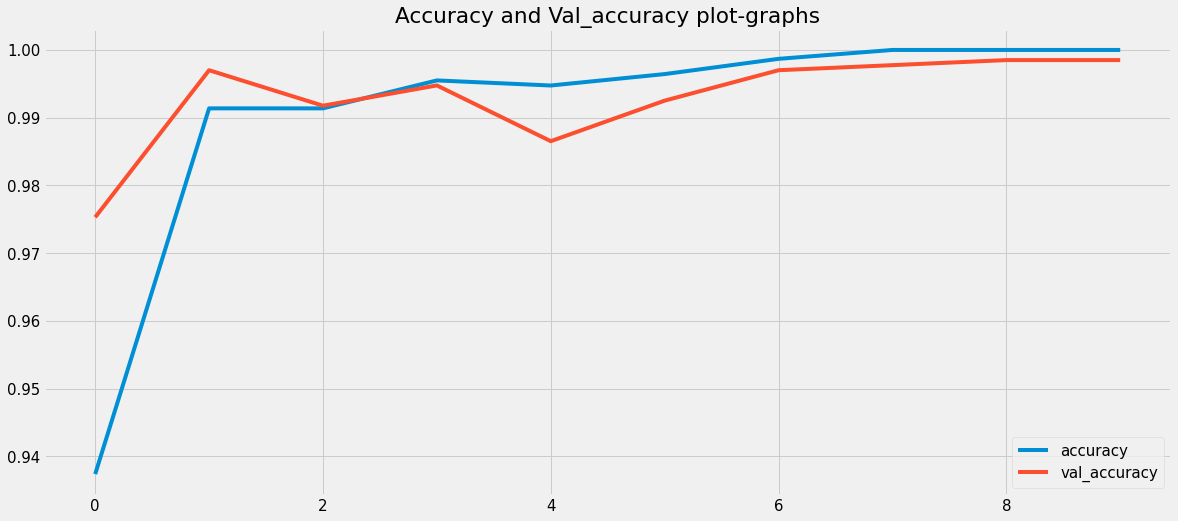

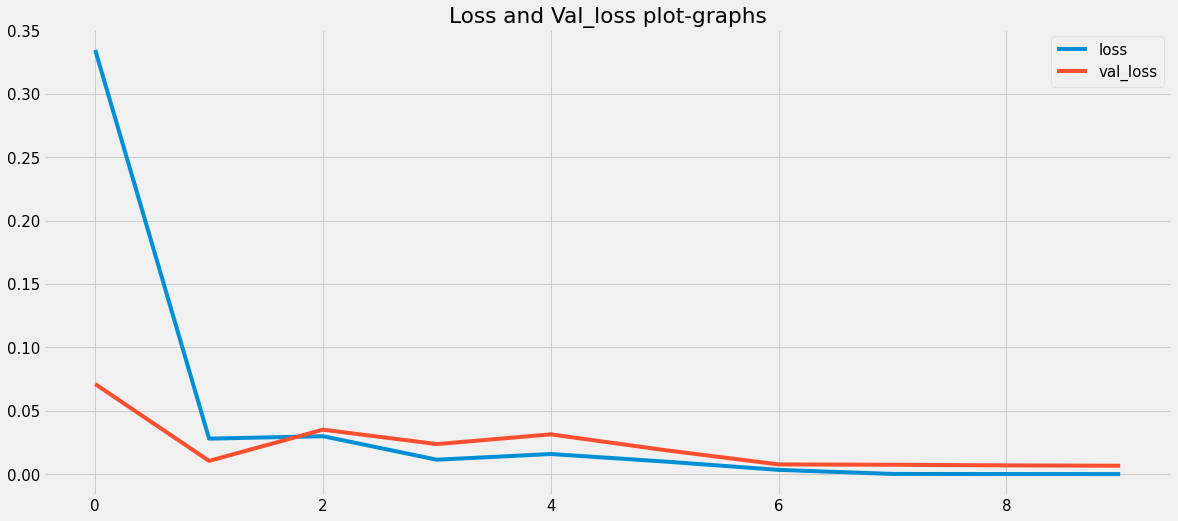

In [34]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=15
    plt.plot(history.history["accuracy"],label="accuracy")
    plt.plot(history.history["val_accuracy"],label="val_accuracy")
    plt.title(label="Accuracy and Val_accuracy plot-graphs")
    plt.legend()
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history.history["loss"],label="loss")
    plt.plot(history.history["val_loss"],label="val_loss")
    plt.title(label="Loss and Val_loss plot-graphs")
    plt.legend()
    plt.show()

In [35]:
dense_model_prediction=dense_model.predict(X_test,batch_size=64,verbose=1)

21/21 [==============================] - 48s 2s/step


In [36]:
print(dense_model_prediction)

[[9.9985230e-01 1.4768376e-04 2.5707985e-08 7.5083690e-09 5.7531716e-11
  5.0743704e-14]
 [9.9975330e-01 1.8868555e-04 6.4752936e-07 2.4117983e-07 5.7147103e-05
  3.6307863e-11]
 [9.4649231e-01 7.0828537e-06 7.0040830e-04 1.6107999e-05 5.2783951e-02
  3.3991858e-11]
 ...
 [3.0635183e-15 3.6141199e-09 5.2989573e-13 3.8665777e-14 1.2394579e-11
  1.0000000e+00]
 [1.6692052e-15 5.4707664e-07 3.3359312e-14 3.1225229e-14 1.0949793e-12
  9.9999940e-01]
 [1.3571169e-15 1.5747808e-07 1.9167871e-14 1.8451325e-14 6.9012097e-13
  9.9999988e-01]]


In [37]:
dense_model_pred=[]
for i in range(len(dense_model_prediction)):
    dense_model_pred.append(np.argmax(dense_model_prediction[i]))

In [38]:
print(dense_model_pred)

[0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [39]:
true_labels=[]
for i in range(len(y_test)):
    true_labels.append(np.argmax(y_test[i]))

In [40]:
print(true_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### Result Analysis

***Accuracy Score***

In [41]:
densemodel_accuracy=accuracy_score(y_true=true_labels,y_pred=dense_model_pred)
print(f"Validation accuracy of DenseNet201 model accuracy is {densemodel_accuracy*100.0:.2f}%")

Validation accuracy of DenseNet201 model accuracy is 99.85%


***Classification Report***

In [42]:
from IPython.core.display import display,HTML
display(HTML("<h1>DenseNet201 model classification report"))
print(classification_report(y_true=true_labels,y_pred=dense_model_pred,target_names=class_labels))

              precision    recall  f1-score   support

   Apple_Bad       1.00      1.00      1.00       229
  Apple_Good       1.00      1.00      1.00       230
  Banana_Bad       1.00      1.00      1.00       218
 Banana_Good       1.00      1.00      1.00       223
    Lime_Bad       1.00      1.00      1.00       217
   Lime_Good       1.00      1.00      1.00       219

    accuracy                           1.00      1336
   macro avg       1.00      1.00      1.00      1336
weighted avg       1.00      1.00      1.00      1336



***Confusion Matrix***

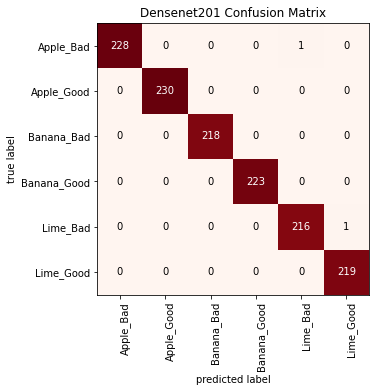

In [43]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_true=true_labels,y_pred=dense_model_pred),
                        figsize=(5,5),
                        class_names=class_labels,
                        cmap=plt.cm.Reds)
plt.title(label="Densenet201 Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

***Model Saving***

In [44]:
dense_model.save(filepath="models/DenseNet201_model.h5")

## Thank You